In [1]:
import numpy as np
import matplotlib.pyplot as plt
from util.plot_util import PlotSVM2D
from util.plot_util import PlotSVM3D

### XOR problem

In [2]:
x0 = [True, True, False, False]
x1 = [True, False, True, False]

Y = np.logical_xor(x0, x1)
print(Y)

[False  True  True False]


Text(0, 0.5, 'x1')

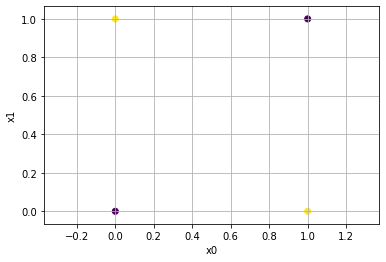

In [3]:
#plt.figure(dpi=150)
plt.scatter(x0, x1, c=Y)
plt.grid('on')
plt.axis('equal')
plt.xlabel('x0')
plt.ylabel('x1')

### Data preparation for XOR problem

In [4]:
np.random.seed(0)
X = np.random.randn(200, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
Y = np.where(Y, 1, 0)

In [5]:
x0 = X[:, 0]
x1 = X[:, 1]

Text(0, 0.5, 'x1')

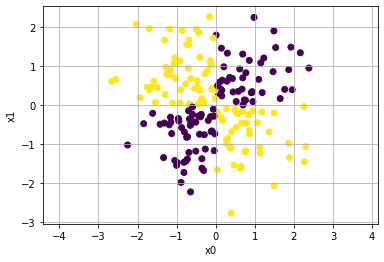

In [6]:
plt.scatter(x0, x1, c=Y)
plt.grid('on')
plt.axis('equal')
plt.xlabel('x0')
plt.ylabel('x1')

<center>$(x_1, x_2) \;\;\; \rightarrow \;\;\; \phi(x) = (x_1^2, \sqrt{2}x_1x_2, x_2^2)$</center>

In [7]:
x0 = X[:, 0]**2
x1 = X[:, 1]**2
x2 = np.sqrt(2)*X[:, 0]*X[:, 1]

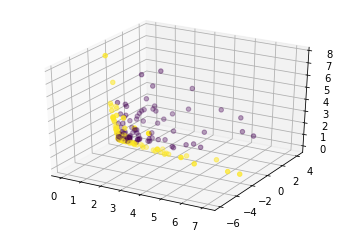

In [8]:
#%matplotlib notebook  # 3d plot 움직일 수 있음
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x0,x2,x1, c=Y)

## SVM Test #1

2D input data (XOR) & Linear kernel

In [9]:
from sklearn.svm import SVC

model1 = SVC(kernel="linear")
model1.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

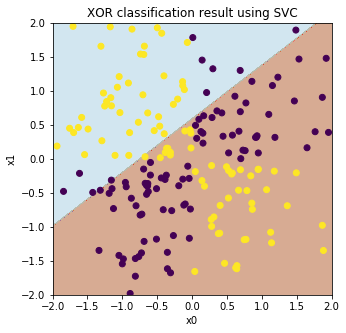

In [10]:
PlotSVM2D(X, Y, model1, "XOR classification result using SVC")
plt.show()

## SVM Test #2

3D input data (XOR) & Linear kernel

In [11]:
X2 = np.vstack([X[:, 0]**2, np.sqrt(2)*X[:, 0]*X[:, 1], X[:, 1]**2]).T

In [12]:
X2.shape

(200, 3)

In [13]:
model2 = SVC(kernel ='linear')

In [14]:
model2.fit(X2, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

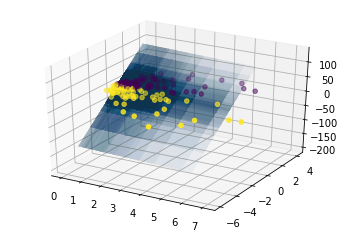

In [15]:
PlotSVM3D(X2, Y, model=model2)

## SVM Test #3

2D input data (XOR) & Conversion Function

In [16]:
from sklearn.preprocessing import FunctionTransformer

def basis(X):
    return np.vstack([X[:, 0]**2, np.sqrt(2)*X[:, 0]*X[:, 1], X[:, 1]**2]).T

In [17]:
from sklearn.pipeline import Pipeline

model3 = Pipeline([("basis", FunctionTransformer(basis)), ("svc", SVC(kernel="linear"))])
model3.fit(X, Y)

/home/seung/.venv/tf200py368/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/home/seung/.venv/tf200py368/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('basis',
                 FunctionTransformer(accept_sparse=False, check_inverse=True,
                                     func=<function basis at 0x7fab1afd0510>,
                                     inv_kw_args=None, inverse_func=None,
                                     kw_args=None, pass_y='deprecated',
                                     validate=None)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

/home/seung/.venv/tf200py368/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


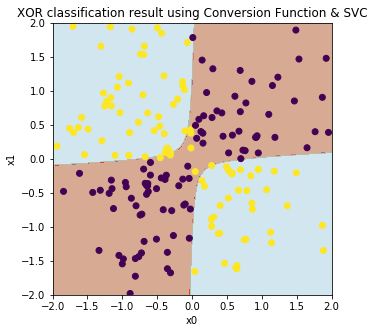

In [18]:
PlotSVM2D(X, Y, model3, "XOR classification result using Conversion Function & SVC")
plt.show()

/home/seung/.venv/tf200py368/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/home/seung/.venv/tf200py368/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


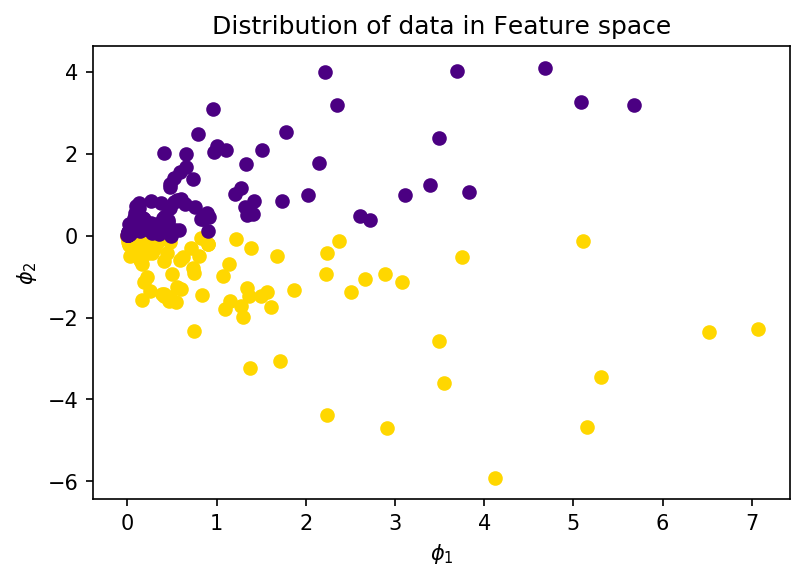

In [20]:
X2 = FunctionTransformer(basis).fit_transform(X)
#plt.figure(dpi=150)
plt.scatter(X2[Y == 1, 0], X2[Y == 1, 1], c='gold')
plt.scatter(X2[Y == 0, 0], X2[Y == 0, 1], c='indigo')
plt.title("Distribution of data in Feature space")
plt.xlabel(r"$\phi_1$")
plt.ylabel(r"$\phi_2$")
plt.show()